In [1]:
# Dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
# File to Load
olympic_csv = "resources/athlete_events.csv"

# Read .csv File and store into Pandas data frame
olympic_raw = pd.read_csv(olympic_csv)
olympic_raw.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
# remove all rows of data for Olympics taking place before the end of WW2 (1945).
olympic_raw_post_war = olympic_raw[olympic_raw.Year > 1945]

# this is our raw dataframe for post ward data.
olympic_raw_post_war.head()

# split dataframe into two separate dataframes by summer and winter games
# this is our dataframe for summer olympic data, post WW2.
summer_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Winter"]
# this is our dataframe for winter olympic data, post WW2.
winter_olympics = olympic_raw_post_war[olympic_raw_post_war.Season != "Summer"]

In [4]:
len(summer_olympics)

186069

In [5]:
summer_olympics_clean = summer_olympics.loc[summer_olympics["Age"].notna() & summer_olympics["Sex"].notna() &
    summer_olympics["Year"].notna()]
len(summer_olympics_clean)

182967

In [6]:
summer_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NaN
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NaN


In [7]:
summer_olympics_clean["Medal"].fillna("No Medal", inplace = True)
summer_olympics_clean

/Users/ryandickson/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,No Medal
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,No Medal
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,No Medal


In [8]:
pd.crosstab(summer_olympics_clean.Sex, summer_olympics_clean.Medal, margins = True)

Medal,Bronze,Gold,No Medal,Silver,All
Sex,,,,,
F,3036,3001,48416,2991,57444
M,5906,5676,108403,5538,125523
All,8942,8677,156819,8529,182967


In [9]:
summer_sex = pd.DataFrame({
    "Medal":["Gold", "Silver", "Bronze", "No Medal"],
    "Females":[3001, 2991, 3036, 57444],
    "Males":[5676, 5538, 5906, 125523]
})
summer_sex.head()

,Medal,Females,Males
0,Gold,3001,5676
1,Silver,2991,5538
2,Bronze,3036,5906
3,No Medal,57444,125523


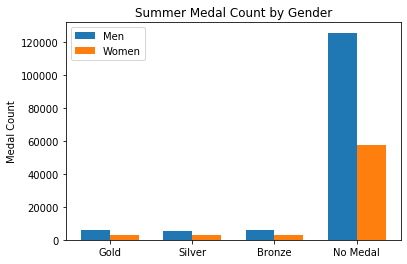

In [10]:
# Summer Medal Count by Gender (includes no medal)

labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [5676, 5538, 5906, 125523]
female_count = [3001, 2991, 3036, 57444]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")

ax.set_ylabel("Medal Count")
ax.set_title("Summer Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

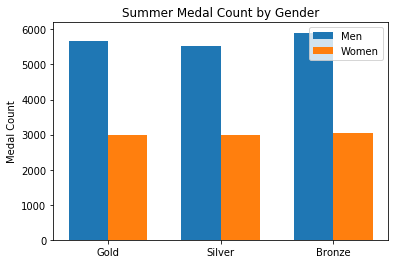

In [11]:
# Summer Medal Count by Gender (excludes no medal)

labels = ["Gold", "Silver", "Bronze"]
male_count = [5676, 5538, 5906]
female_count = [3001, 2991, 3036]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")

ax.set_ylabel("Medal Count")
ax.set_title("Summer Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [12]:
winter_olympics_clean = winter_olympics.loc[winter_olympics["Age"].notna() & winter_olympics["Sex"].notna() &
    winter_olympics["Year"].notna()]
len(winter_olympics_clean)

46171

In [13]:
winter_olympics_clean["Medal"].fillna("No Medal", inplace = True)
winter_olympics_clean

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No Medal
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No Medal
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No Medal
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,No Medal
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",No Medal
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",No Medal
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,No Medal


In [14]:
pd.crosstab(winter_olympics_clean.Sex, winter_olympics_clean.Medal, margins = True)

Medal,Bronze,Gold,No Medal,Silver,All
Sex,,,,,
F,588,598,13142,598,14926
M,1167,1162,27753,1163,31245
All,1755,1760,40895,1761,46171


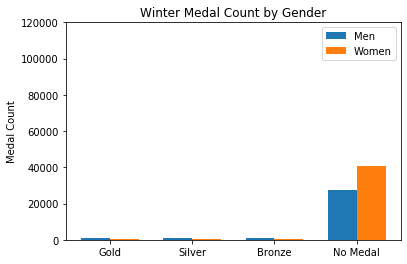

In [15]:
# Winter Medal Count by Gender (includes no medal) set at summer y max

labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [1162, 1163, 1167, 27753]
female_count = [598, 598, 588, 40895]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
plt.ylim(0, 120000)
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

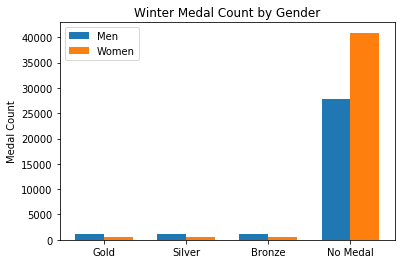

In [16]:
# Winter Medal Count by Gender (includes no medal) set by program
labels = ["Gold", "Silver", "Bronze", "No Medal"]
male_count = [1162, 1163, 1167, 27753]
female_count = [598, 598, 588, 40895]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

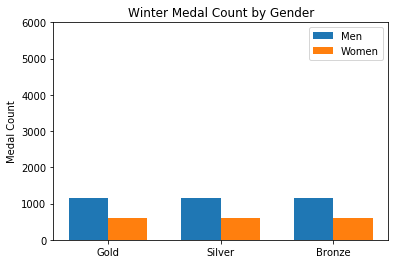

In [17]:
# Winter Medal Count by Gender (excludes no medal) set at summer y max

labels = ["Gold", "Silver", "Bronze"]
male_count = [1162, 1163, 1167]
female_count = [598, 598, 588]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
plt.ylim(0, 6000)
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

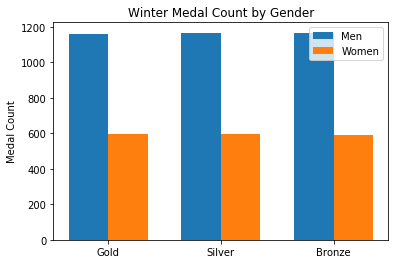

In [18]:
# Winter Medal Count by Gender (excludes no medal) set by program

labels = ["Gold", "Silver", "Bronze"]
male_count = [1162, 1163, 1167]
female_count = [598, 598, 588]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, male_count, width, label="Men")
rects2 = ax.bar(x + width/2, female_count, width, label="Women")
ax.set_ylabel("Medal Count")
ax.set_title("Winter Medal Count by Gender")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

In [19]:
summer_olympics_clean.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No Medal
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No Medal
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,No Medal
31,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,No Medal
32,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,No Medal


In [21]:
summer_basic = summer_olympics_clean[["Sex", "Year", "Medal"]]
summer_basic.head()

,Sex,Year,Medal
0,M,1992,No Medal
1,M,2012,No Medal
29,M,1952,No Medal
31,M,2000,No Medal
32,F,1996,No Medal


In [33]:
array = ["Bronze", "Silver", "Gold"]
summer_basic_sex = summer_basic.loc[summer_basic["Medal"].isin(array)]
summer_basic_sex.head()

,Sex,Year,Medal
41,M,1948,Bronze
42,M,1948,Gold
44,M,1948,Gold
48,M,1948,Gold
50,M,1952,Bronze


In [70]:
summer_basic_sex.reset_index

<bound method DataFrame.reset_index of        Sex  Year   Medal
41       M  1948  Bronze
42       M  1948    Gold
44       M  1948    Gold
48       M  1948    Gold
50       M  1952  Bronze
...     ..   ...     ...
271078   F  1956  Silver
271080   F  1964  Bronze
271082   M  1980  Bronze
271102   F  2000  Bronze
271103   F  2004  Silver

[26148 rows x 3 columns]>

In [72]:
summer_basic_sex.head()

,Sex,Year,Medal
41,M,1948,Bronze
42,M,1948,Gold
44,M,1948,Gold
48,M,1948,Gold
50,M,1952,Bronze


In [74]:
summer_basic_sex.plot(x=["Year"], y=["F", "M"], kind="bar")

ValueError: x must be a label or position

In [71]:
summer_basic_sex.groupby(["Sex", "Year"].as_index=False).count()

SyntaxError: keyword can't be an expression (<ipython-input-71-81648d0e0ffe>, line 1)

In [63]:
summer_counts = pd.DataFrame(summer_basic_sex.groupby(["Year", "Sex"]).count())
summer_counts

Medal
Year Sex       
1948 F      100
     M      736
1952 F      140
     M      756
1956 F      143
     M      737
1960 F      156
     M      752
1964 F      200
     M      827
1968 F      215
     M      840
1972 F      250
     M      964
1976 F      389
     M      931
1980 F      434
     M      950
1984 F      494
     M      981
1988 F      554
     M     1028
1992 F      592
     M     1120
1996 F      764
     M     1078
2000 F      880
     M     1124
2004 F      898
     M     1103
2008 F      932
     M     1116
2012 F      918
     M     1023
2016 F      969
     M     1054

In [66]:
summer_counts.Mplot(x=["Year"], y=["F", "M"], kind="bar")

KeyError: "None of [Index(['Year'], dtype='object')] are in the [columns]"

In [22]:
winter_basic = winter_olympics_clean[["Sex", "Year", "Medal"]]
winter_basic.head()

,Sex,Year,Medal
4,F,1988,No Medal
5,F,1988,No Medal
6,F,1992,No Medal
7,F,1992,No Medal
8,F,1994,No Medal


In [34]:
array = ["Bronze", "Silver", "Gold"]
winter_basic_sex = winter_basic.loc[winter_basic["Medal"].isin(array)]
winter_basic_sex.head()

,Sex,Year,Medal
40,M,2014,Bronze
60,M,1992,Gold
61,M,1992,Bronze
63,M,1994,Silver
64,M,1994,Bronze


In [39]:
winter_counts = winter_basic_sex.groupby(["Sex", "Year"]).count()
print(winter_counts)

          Medal
Sex Year       
F   1948     15
    1952     18
    1956     27
    1960     39
    1964     46
    1968     46
    1972     45
    1976     51
    1980     51
    1984     54
    1988     63
    1992     99
    1994    108
    1998    189
    2002    208
    2006    231
    2010    229
    2014    265
M   1948    120
    1952    118
    1956    123
    1960    108
    1964    140
    1968    153
    1972    154
    1976    160
    1980    167
    1984    168
    1988    200
    1992    219
    1994    223
    1998    251
    2002    270
    2006    295
    2010    291
    2014    332
